<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="https://raw.githubusercontent.com/jupyter/nature-demo/master/images/jupyter-logo.png" width="100px" style="display: inline-block; margin-top: 10px;">
<a href="https://mybinder.org"><img src="https://mybinder.org/static/logo.svg" width="120px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

# Optimization and Interpolation with SciPy

This notebook is a part of [Lectures on scientific computing with Python](http://github.com/jrjohansson/scientific-python-lectures) by [J.R. Johansson](http://jrjohansson.github.io). 

<div class="alert alert-info" role="alert" style="margin: 10px">
<p>This notebook is running on a server that was <b>launched just for you</b>. Your changes will be reset once server restarts due to inactivity, so don't rely on it for anything you want to last.
</p>
</div>

Your server is hosted thanks to [binder](https://mybinder.org), service that allows you to create custom computing environments based on GitHub repositories.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ["retina"]
from IPython.display import Image
from scipy import *

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [2]:
from scipy import optimize

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [3]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

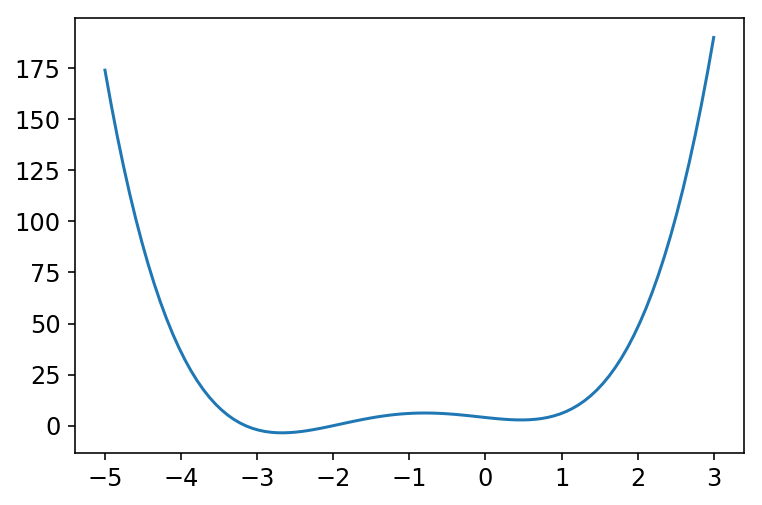

In [4]:
# Restoring font size.
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

fig, ax  = plt.subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

We can use the `fmin_bfgs` function to find the minima of a function:

In [5]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298151])

In [6]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([0.46961745])

We can also use the `brent` or `fminbound` functions. They have a bit different syntax and use different algorithms. 

In [7]:
optimize.brent(f)

0.46961743402759754

In [8]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Finding a solution to a function

To find the root for a function of the form $f(x) = 0$ we can use the `fsolve` function. It requires an initial guess: 

In [9]:
omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return tan(2*pi*omega) - omega_c/omega

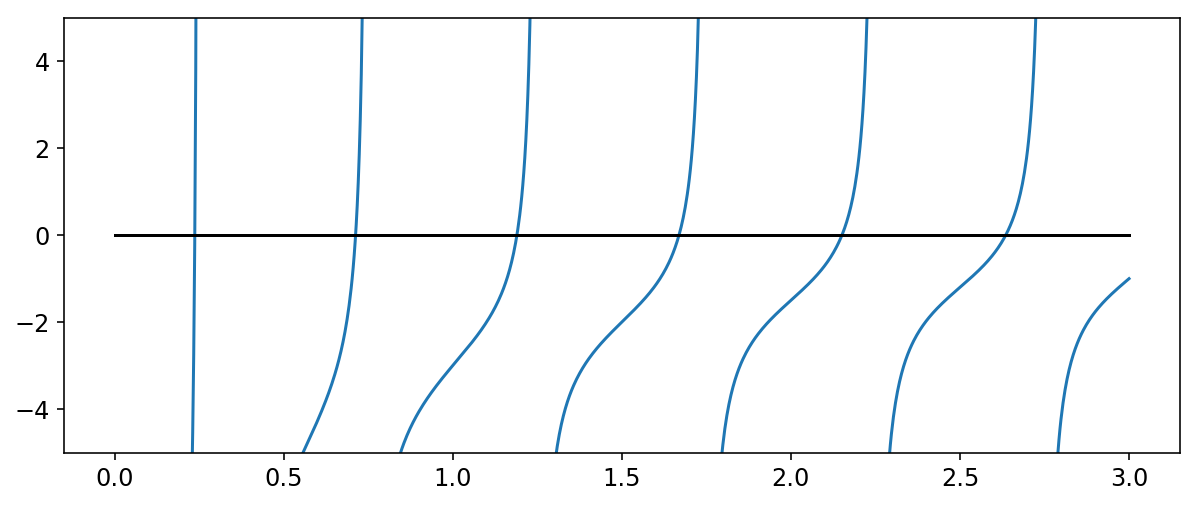

In [10]:
fig, ax  = plt.subplots(figsize=(10,4))
x = linspace(0+1e-8, 3, 1000)
y = f(x)
mask = where(abs(y) > 50)
x[mask] = y[mask] = NaN # get rid of vertical line when the function flip sign
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [11]:
optimize.fsolve(f, 0.1)

array([0.23743014])

In [12]:
optimize.fsolve(f, 0.6)

array([0.71286972])

In [13]:
optimize.fsolve(f, 1.1)

array([1.18990285])

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:

In [14]:
from scipy.interpolate import *

In [15]:
def f(x):
    return sin(x)

In [16]:
n = arange(0, 10)  
x = linspace(0, 9, 100)

y_meas = f(n) + 0.1 * randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

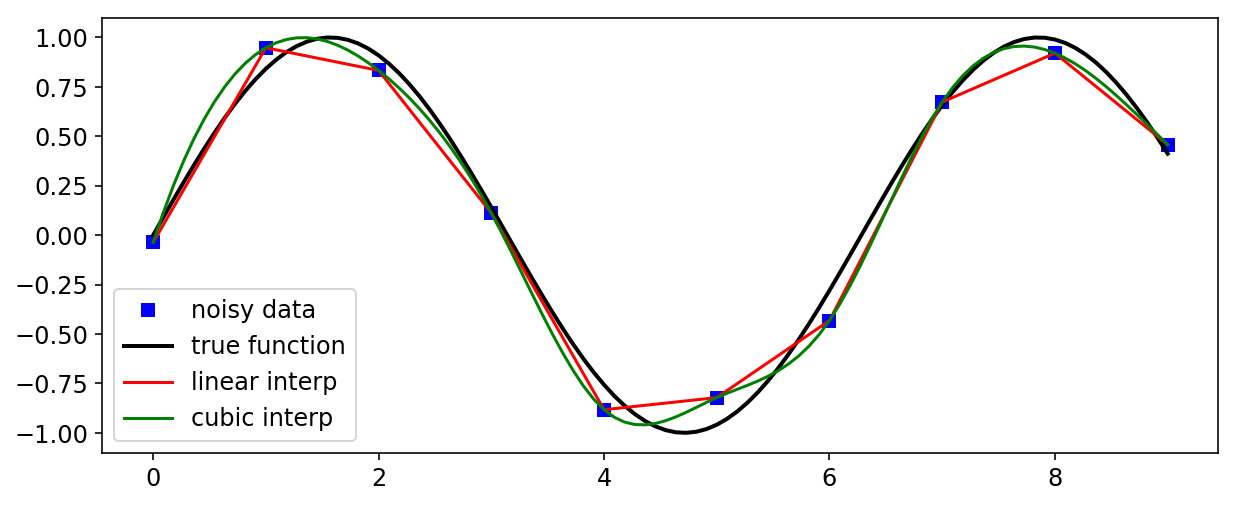

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Further reading

* Check out more introductory notebooks in **Juno**!
* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 

## Versions

In [18]:
%reload_ext version_information

%version_information numpy, matplotlib, scipy

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.3.0
OS Darwin 18.5.0 x86_64 i386 64bit
numpy 1.16.2
matplotlib 3.0.3
scipy 1.2.1
Tue Apr 30 09:03:39 2019 BST